In [1]:
coordinates_sitting = [[('head_top', 0.5059929494712103, 0.12907608695652173), ('upper_neck', 0.4580493537015276, 0.27309782608695654), ('right_shoulder', 0.4620446533490012, 0.32472826086956524), ('right_elbow', 0.5299647473560516, 0.47146739130434784), ('right_wrist', 0.7257344300822562, 0.5448369565217391), ('thorax', 0.4460634547591069, 0.31929347826086957), ('left_shoulder', 0.42608695652173917, 0.31657608695652173), ('left_elbow', 0.5019976498237368, 0.44972826086956524), ('left_wrist', 0.6897767332549941, 0.53125), ('pelvis', 0.4660399529964747, 0.561141304347826), ('right_hip', 0.4620446533490012, 0.5720108695652174), ('right_knee', 0.7976498237367803, 0.6100543478260869), ('right_ankle', 0.7896592244418331, 0.84375), ('left_hip', 0.47802585193889546, 0.5529891304347826), ('left_knee', 0.7776733254994125, 0.5720108695652174), ('left_ankle', 0.7616921269095182, 0.8057065217391305)]]

In [2]:
coordinates_standing = [[('head_top', 0.4807192099475554, 0.042119565217391304), ('upper_neck', 0.5247895872102859, 0.19701086956521738), ('right_shoulder', 0.5468247758416512, 0.22418478260869565), ('right_elbow', 0.5413159786838098, 0.3546195652173913), ('right_wrist', 0.4641928184740315, 0.4633152173913043), ('thorax', 0.5413159786838098, 0.2269021739130435), ('left_shoulder', 0.5413159786838098, 0.2269021739130435), ('left_elbow', 0.5468247758416512, 0.35733695652173914), ('left_wrist', 0.43114003552698354, 0.48777173913043476), ('pelvis', 0.5468247758416512, 0.48777173913043476), ('right_hip', 0.5633511673151751, 0.485054347826087), ('right_knee', 0.5523335729994924, 0.686141304347826), ('right_ankle', 0.5688599644730163, 0.8682065217391305), ('left_hip', 0.5358071815259685, 0.48777173913043476), ('left_knee', 0.5578423701573338, 0.6997282608695652), ('left_ankle', 0.5633511673151751, 0.9035326086956522)]]

In [3]:
coordinates = coordinates_sitting
#coordinates = coordinates_standing
coordinates

[[('head_top', 0.5059929494712103, 0.12907608695652173),
  ('upper_neck', 0.4580493537015276, 0.27309782608695654),
  ('right_shoulder', 0.4620446533490012, 0.32472826086956524),
  ('right_elbow', 0.5299647473560516, 0.47146739130434784),
  ('right_wrist', 0.7257344300822562, 0.5448369565217391),
  ('thorax', 0.4460634547591069, 0.31929347826086957),
  ('left_shoulder', 0.42608695652173917, 0.31657608695652173),
  ('left_elbow', 0.5019976498237368, 0.44972826086956524),
  ('left_wrist', 0.6897767332549941, 0.53125),
  ('pelvis', 0.4660399529964747, 0.561141304347826),
  ('right_hip', 0.4620446533490012, 0.5720108695652174),
  ('right_knee', 0.7976498237367803, 0.6100543478260869),
  ('right_ankle', 0.7896592244418331, 0.84375),
  ('left_hip', 0.47802585193889546, 0.5529891304347826),
  ('left_knee', 0.7776733254994125, 0.5720108695652174),
  ('left_ankle', 0.7616921269095182, 0.8057065217391305)]]

In [4]:
import math
import matplotlib.pyplot as plt

def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang

def get_posture(coordinates, show=True):

    for coordinate in coordinates:
        coordinate_dict = {}
        for body_part,x,y in coordinate:
            coordinate_dict[body_part] = (x,y)

        if show:
            
            plt.figure(figsize=(10,5))

            plt.subplot(1,2,1)
            plt.xlim([0,1])
            plt.ylim([0,1])
            plt.scatter(coordinate_dict['left_hip'][0],coordinate_dict['left_hip'][1],label='Left Hip')
            plt.scatter(coordinate_dict['left_knee'][0],coordinate_dict['left_knee'][1],label='Left Knee')
            plt.scatter(coordinate_dict['left_ankle'][0],coordinate_dict['left_ankle'][1],label='Left Ankle')
            plt.legend()  
            plt.title('Left Leg')

            plt.subplot(1,2,2)
            plt.xlim([0,1])
            plt.ylim([0,1])
            plt.scatter(coordinate_dict['right_hip'][0],coordinate_dict['right_hip'][1],label='Right Hip')
            plt.scatter(coordinate_dict['right_knee'][0],coordinate_dict['right_knee'][1],label='Right Knee')
            plt.scatter(coordinate_dict['right_ankle'][0],coordinate_dict['right_ankle'][1],label='Right Ankle')
            plt.legend()  
            plt.title('Right Leg')

            plt.suptitle('Visualizing Hip, Knee, Ankle Points')

            plt.show()

        left_angle = getAngle(coordinate_dict['left_hip'],coordinate_dict['left_knee'],coordinate_dict['left_ankle'])
        right_angle = getAngle(coordinate_dict['right_hip'],coordinate_dict['right_knee'],coordinate_dict['right_ankle'])
        angle = (abs(left_angle) + abs(right_angle)) / 2
        
        print('\n===================Predicting Posture========================')
        print('Angle formed by hips, knees and ankles: ',angle)

        minimum = 10000
        index = 0
        for i in range(5):
            if abs(angle - 90 * i) < minimum:
                minimum = abs(angle - 90 * i)
                index = i
        #print(minimum, index)
        if minimum > 30:
            posture = 'Unknown'
            print('Infered Posture from above angle: Unknown')
        else:
            if index % 2 == 0:
                posture = 'Standing'
                print('Infered Posture from above angle: Standing')
            if index % 2 != 0:
                posture = 'Sitting'
                print('Infered Posture from above angle: Sitting')
                
        print('==============================================================')

        return posture

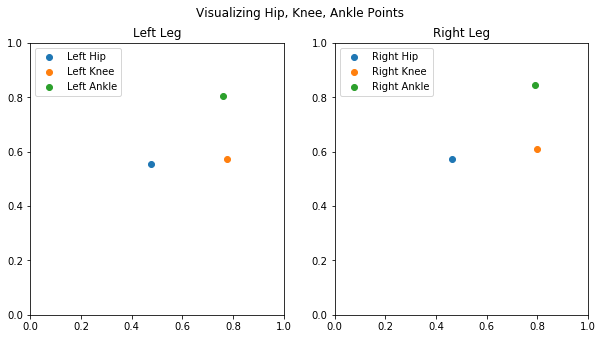


===================Predicting Posture========================
Angle formed by hips, knees and ankles:  267.8853860392155
Infered Posture from above angle: Sitting


'Sitting'

In [5]:
get_posture(coordinates)